In [1]:
#importing the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from pylab import rcParams
from math import sqrt
from sklearn.metrics import mean_squared_error

In [2]:
#loading the data
airlines_data = pd.read_excel("Airlines+Data.xlsx")
airlines_data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


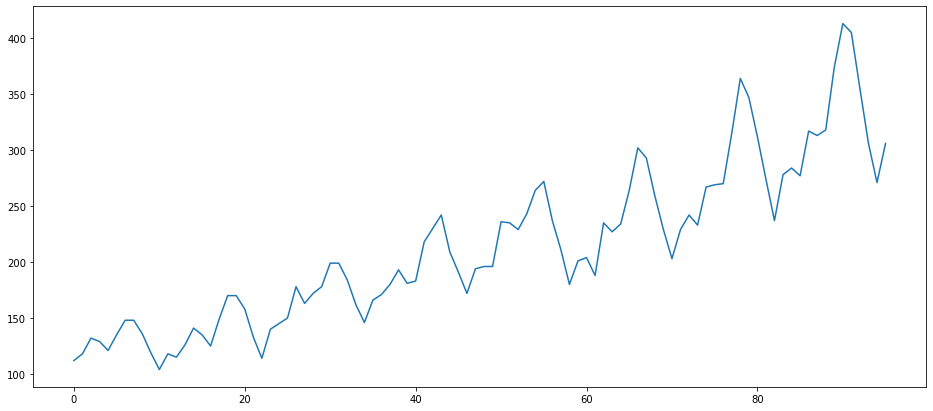

In [3]:
airlines_data['Passengers'].plot(figsize=(16,7));

# The data has a trend and is not stationary.

In [4]:
airlines_data = airlines_data.set_index('Month')
# SMA over a period of 2 and 3 years 
airlines_data['SMA_2'] = airlines_data['Passengers'].rolling(2, min_periods=1).mean()
airlines_data['SMA_4'] = airlines_data['Passengers'].rolling(4, min_periods=1).mean()
airlines_data['SMA_6'] = airlines_data['Passengers'].rolling(6, min_periods=1).mean()

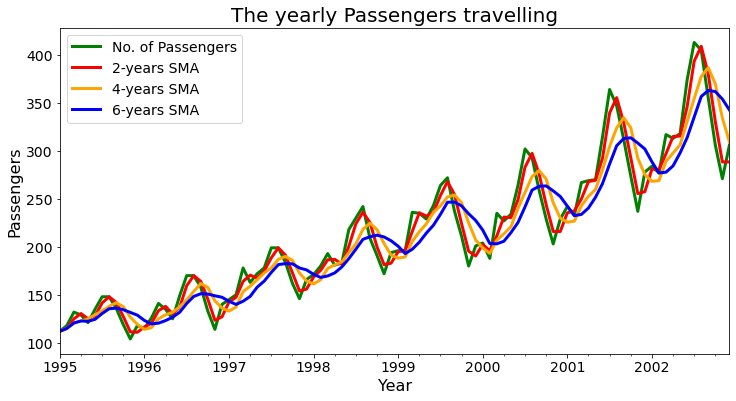

In [5]:
#Plotting Simple Moving Averge
colors = ['green', 'red', 'orange','blue']
# Line plot 
airlines_data.plot(color=colors, linewidth=3, figsize=(12,6))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['No. of Passengers', '2-years SMA', '4-years SMA','6-years SMA'], fontsize=14)
plt.title('The yearly Passengers travelling', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Passengers', fontsize=16);

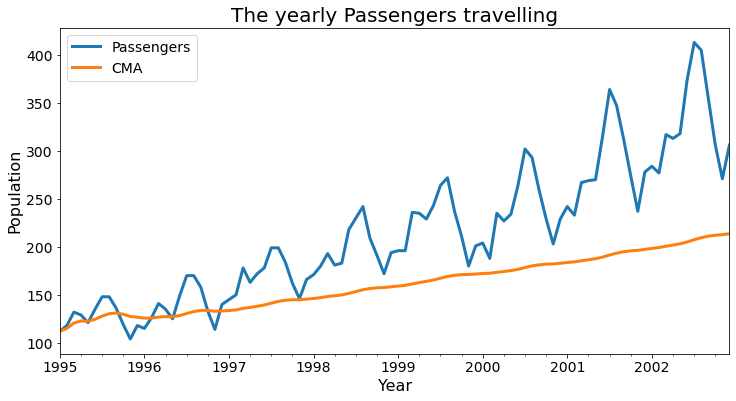

In [6]:
#plotting Cumulative Moving Average
airlines_data['CMA'] = airlines_data['Passengers'].expanding().mean()
airlines_data[['Passengers', 'CMA']].plot( linewidth=3, figsize=(12,6))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Passengers', 'CMA'], fontsize=14)
plt.title('The yearly Passengers travelling', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Population', fontsize=16);

In [7]:
#Calculating and plotting Exponential MOving average
airlines_data['Ema_0.1'] = airlines_data['Passengers'].ewm(alpha=0.1,adjust=False).mean()
airlines_data['Ema_0.3'] = airlines_data['Passengers'].ewm(alpha=0.3,adjust=False).mean()

Text(0, 0.5, 'Passengers')

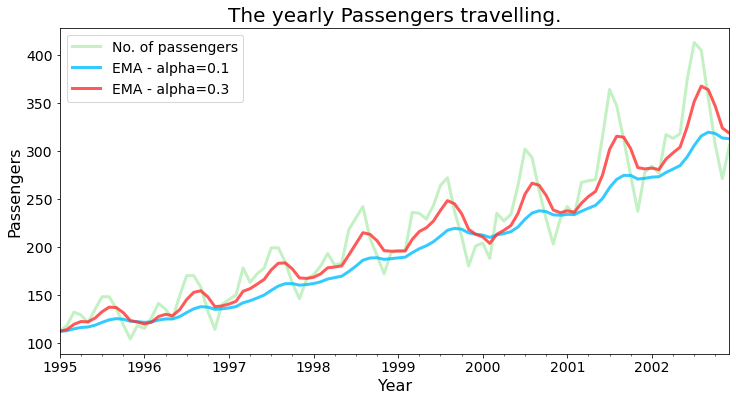

In [8]:
colors = ['#B4EEB4', '#00BFFF', '#FF3030']
airlines_data[['Passengers', 'Ema_0.1', 'Ema_0.3']].plot(color=colors, linewidth=3, figsize=(12,6), alpha=0.8)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels=['No. of passengers', 'EMA - alpha=0.1', 'EMA - alpha=0.3'], fontsize=14)
plt.title('The yearly Passengers travelling.', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Passengers', fontsize=16)

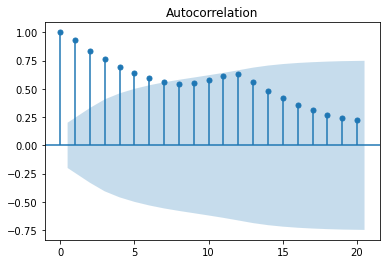

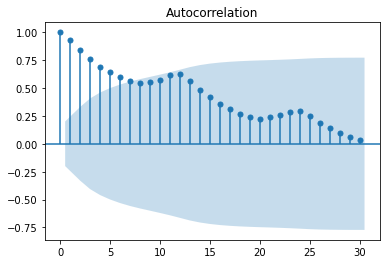

In [9]:
plot_acf(airlines_data['Passengers'])
plt.show()
plot_acf(airlines_data['Passengers'],lags=30)
plt.show()


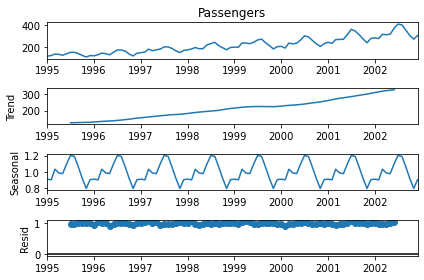

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
ts_mul = seasonal_decompose(airlines_data.Passengers,model="multiplicative")
fig = ts_mul.plot()
plt.show();

# Building Arima Model

In [11]:
X = airlines_data['Passengers']
size = int(len(X)*0.75)
size

72

In [12]:
train , test = X.iloc[0:size],X.iloc[size:len(X)]
#train

In [13]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train, order=(5,1,0)).fit(disp=0)

C:\Users\Unique Web System\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Unique Web System\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so 

In [14]:
print(model.summary())

                             ARIMA Model Results                              
Dep. Variable:           D.Passengers   No. Observations:                   71
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -304.792
Method:                       css-mle   S.D. of innovations             17.647
Date:                Tue, 12 Apr 2022   AIC                            623.584
Time:                        10:10:21   BIC                            639.423
Sample:                    02-01-1995   HQIC                           629.883
                         - 12-01-2000                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.8781      1.462      1.285      0.199      -0.987       4.743
ar.L1.D.Passengers     0.1440      0.119      1.213      0.225      -0.089       0.377
ar.L2.D.Passengers  

In [15]:
history = [x for x in train]
history[-1]

229

In [16]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=229.000, Expected=242.000
>Predicted=242.000, Expected=233.000
>Predicted=233.000, Expected=267.000
>Predicted=267.000, Expected=269.000
>Predicted=269.000, Expected=270.000
>Predicted=270.000, Expected=315.000
>Predicted=315.000, Expected=364.000
>Predicted=364.000, Expected=347.000
>Predicted=347.000, Expected=312.000
>Predicted=312.000, Expected=274.000
>Predicted=274.000, Expected=237.000
>Predicted=237.000, Expected=278.000
>Predicted=278.000, Expected=284.000
>Predicted=284.000, Expected=277.000
>Predicted=277.000, Expected=317.000
>Predicted=317.000, Expected=313.000
>Predicted=313.000, Expected=318.000
>Predicted=318.000, Expected=374.000
>Predicted=374.000, Expected=413.000
>Predicted=413.000, Expected=405.000
>Predicted=405.000, Expected=355.000
>Predicted=355.000, Expected=306.000
>Predicted=306.000, Expected=271.000
>Predicted=271.000, Expected=306.000
RMSE: 32.687


# Building and comparing multiple models

In [18]:
final_df = pd.read_excel("Airlines+Data.xlsx")
final_df['Date'] = pd.to_datetime(final_df.Month,format="%b-%y")
final_df['month'] = final_df.Date.dt.strftime("%b") #month extraction
final_df['year'] = final_df.Date.dt.strftime("%y")

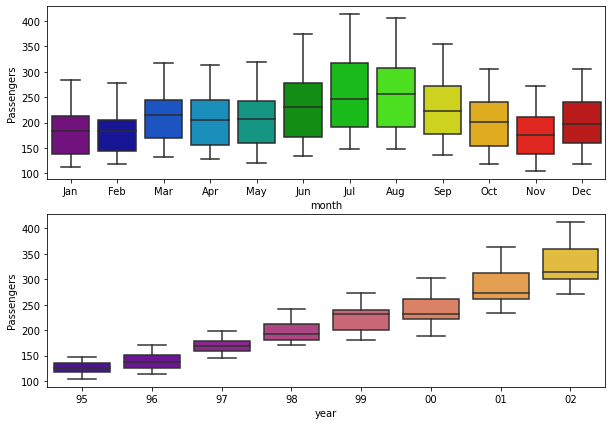

In [19]:
#Boxplot
plt.figure(figsize=(10,7))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=final_df,palette='nipy_spectral')
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=final_df,palette='plasma');

In [20]:
final_df = pd.get_dummies(final_df, columns = ['month'])
#final_df

In [21]:
from typing_extensions import final
t= np.arange(1,97)
final_df['t']= t
final_df['t_square']= (t *t)
log_Passengers=np.log(final_df['Passengers'])
final_df['log_Passengers'] =log_Passengers
final_df

,Month,Passengers,Date,year,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,t,t_square,log_Passengers
0,1995-01-01,112,1995-01-01,95,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,1995-02-01,95,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,1995-03-01,95,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,1995-04-01,129,1995-04-01,95,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,1995-05-01,95,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,02,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887
92,2002-09-01,355,2002-09-01,02,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118
93,2002-10-01,306,2002-10-01,02,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585
94,2002-11-01,271,2002-11-01,02,0,0,0,0,0,0,0,0,0,1,0,0,95,9025,5.602119


In [24]:
Train, Test = np.split(final_df, [int(.75 *len(final_df))])

In [25]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

51.6677929956463

In [26]:
#Exponential

Exp = smf.ols('log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['log_Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

297.3698089836234

In [27]:
#Quadratic 

Quad = smf.ols('Passengers~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

51.990736401554834

In [28]:
#Additive seasonality 

add_sea = smf.ols('Passengers~month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun','month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','month_Dec']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

127.26451565320338

In [29]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Passengers~t+t_square+month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['t','t_square','month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun','month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','month_Dec']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

35.24160848593321

In [31]:
##Multiplicative Seasonality
Mul_sea = smf.ols('log_Passengers~month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test[['month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun','month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','month_Dec']]))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['log_Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

173.46096019630764

In [32]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_Passengers~t+month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test[['t','month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun','month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','month_Dec']]))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['log_Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

303.3646933542646

In [33]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,35.241608
0,rmse_linear,51.667793
2,rmse_Quad,51.990736
3,rmse_add_sea,127.264516
5,rmse_Mult_sea,173.460960
1,rmse_Exp,297.369809
6,rmse_Mult_add_sea,303.364693


In [34]:
#ADDITIVE SEASONALITY HAS THE BEST ACCURACY

In [35]:
model_final = smf.ols('Passengers~t+t_square+month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data=Train).fit()
pred_new  = pd.Series(model_final.predict(Test))
pred_new

72    242.330988
73    244.902987
74    271.141653
75    263.713651
76    262.785650
77    283.357649
78    304.429648
79    306.334980
80    282.906979
81    259.978978
82    239.050977
83    260.622976
84    267.321927
85    269.914497
86    296.173733
87    288.766303
88    287.858873
89    308.451443
90    329.544013
91    331.469917
92    308.062487
93    285.155057
94    264.247627
95    285.840197
dtype: float64

In [36]:
predict_data= pd.DataFrame()
predict_data["forecasted_passengers"] = pd.Series(pred_new)

In [37]:
visualize = pd.concat([Train,predict_data])
visualize

,Month,Passengers,Date,year,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,t,t_square,log_Passengers,forecasted_passengers
0,1995-01-01,112.0,1995-01-01,95,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.718499,NaN
1,1995-02-01,118.0,1995-02-01,95,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,4.770685,NaN
2,1995-03-01,132.0,1995-03-01,95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,9.0,4.882802,NaN
3,1995-04-01,129.0,1995-04-01,95,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,16.0,4.859812,NaN
4,1995-05-01,121.0,1995-05-01,95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,25.0,4.795791,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,331.469917
92,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,308.062487
93,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,285.155057
94,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,264.247627


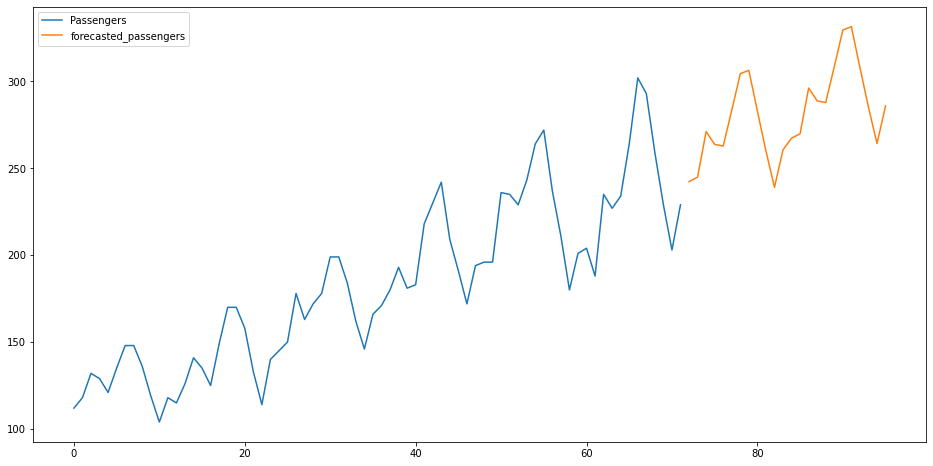

In [38]:
visualize[['Passengers','forecasted_passengers']].reset_index(drop=True).plot(figsize=(16,8));